## Classifying Prime Numbers from MNIST

In [ ]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
train_data = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = ToTensor(), 
    download = True,            
)
test_data = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = ToTensor()
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
print(train_data), print(test_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


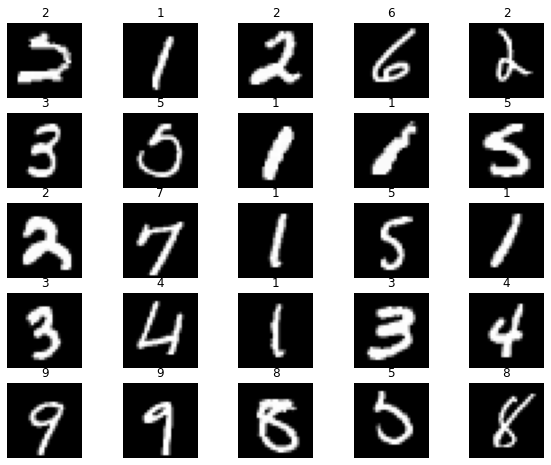

In [ ]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

write a training loop that produces a neural network classifier **trained to distinguish prime digits from non-prime digits**. In other words, given an image of a handwritten 1, 2, 3, 5, or 7, your classifier should be trained to output "1" (i.e. a judgement of "prime"). Conversely, given an image of a handwritten 0, 4, 6, 8, or 9, your classifier should be trained to output "0" (i.e. a judgement of "not prime"). 

 [stochastic gradient descent](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) (SGD) is used to optimize parameter values, and [binary cross entropy loss](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) (BCE) as the training criterion.

In [ ]:
import torch.nn as nn

class CNN(nn.Module):
    '''*********** DO NOT MODIFY THIS CODE **********'''
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         
            nn.Conv2d(
                in_channels=1,              
                out_channels=16,            
                kernel_size=5,              
                stride=1,                   
                padding=2,                  
            ),                              
            nn.ReLU(),                      
            nn.MaxPool2d(kernel_size=2),    
        )
        self.conv2 = nn.Sequential(         
            nn.Conv2d(16, 32, 5, 1, 2),     
            nn.ReLU(),                      
            nn.MaxPool2d(2),                
        )
        self.out = nn.Linear(32 * 7 * 7, 2) # model outputs have dimension 2

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)       
        output = self.out(x)
        return output, x  
    ''' ******** DO NOT MODIFY THIS CODE **********'''

net = CNN()

In [ ]:
import torch.optim as optim

def train(
    net,
    train_data,
    test_data,
    num_epochs: int = 20,
    batch_size: int = 32,
    lr: float = 0.001,
    momentum: float = 0.9):
  
  '''
  Inputs
    `net` (torch.nn.Module): an instance of the `CNN` class defined above.
    `train_data` (torchvision.datasets.MNIST): a torchvision dataset object of 
      MNIST training examples.
    `test_data` (torchvision.datasets.MNIST): a torchvision dataset object of 
      MNIST test examples.
    `num_epochs` (integer): The number of epochs for which to train and test
      the model.
    `batch_size` (integer): the number of data pairs (x, y) used for computing
      loss + loss gradients with SGD at each iteration of training.
    `lr` (float): the learning rate associated with SGD.
    `momentum` (float): the momentum associated with SGD.
  
  Outputs
    `net` (torch.nn.Module): the same CNN object input into this function,
      trained for `num_epochs` with binary cross entropy loss and SGD with batch 
      size `batch_size` + learning rate `lr` + momentum `momentum` to identify
      handwritten *prime numbers*.

  '''
  
  ## Initialize optimizer
  optimizer = optim.SGD(net.parameters(), lr=lr, momentum=momentum)

  criterion = nn.BCELoss()

  ## Set "train" mode "on"
  net.train()

  ## Create dataloaders
  dummy_dataloaders = {
    'train' : torch.utils.data.DataLoader(train_data, 
                                          batch_size=batch_size, 
                                          shuffle=True, 
                                          num_workers=1),
    'test': torch.utils.data.DataLoader(test_data, 
                                        batch_size=batch_size, 
                                        shuffle=True, 
                                        num_workers=1),
  }

  ## Initialize dataloader

  ## Main loop goes here
  for epoch in range(num_epochs):
    running_loss = 0.0
    for mode in ['train', 'test']:
      for i, (images,labels) in enumerate(dummy_dataloaders[mode]):

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(images)[0]
        m = nn.Softmax(dim=0)
        output = m(outputs)
        prime = torch.zeros_like(labels)
        n=0
        for j in labels:
          if j > 1:
            for k in range(2, int(j/2)+1):
              if (j%k) == 0:
                prime[n] = 0
                break
              else: 
                prime[n] =1
          else:
            prime[n] = 0
          n+=1
            
        loss = criterion(output[:,1], prime.float())
        loss.backward()
        optimizer.step()

        '''
        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 200:.3f}')
            running_loss = 0.0
        '''
        
  
  ## Return trained network
  return net